<a href="https://colab.research.google.com/github/ivanpaulcodes/GoogleColabML/blob/main/Rellora_LabActivity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
#specify the data file name and url

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/'
datafile = url + 'UCI%20HAR%20Dataset.zip'

#download the zip file from web server using curl

!curl $datafile --output UCI_HAR_Dataset.zip

#unzip the file

!unzip -qq UCI_HAR_Dataset.zip

#change th directory name to remove spaces

!mv -f UCI\ HAR\ Dataset UCI_HAR_DATASET




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58.1M    0 58.1M    0     0  11.0M      0 --:--:--  0:00:05 --:--:-- 13.9M


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split

# TRAIN DATA - BODY ONLY
# load the data for X, Y and Z coordinates for training data
xx = np.loadtxt('/content/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt').astype(np.float32)
yy = np.loadtxt('/content/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt').astype(np.float32)
zz = np.loadtxt('/content/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt').astype(np.float32)

# concatenate the arrays along the last dimension
# (using None here adds an extra dimension of size 1 to the end of the array)
x_train_body_only = np.concatenate((xx[..., None], yy[..., None], zz[..., None]), axis=2)
print('shape x_train_body_only: ', x_train_body_only.shape)

# TEST DATA - BODY ONLY
# load the data for X, Y and Z coordinates for test data
xx = np.loadtxt('/content/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt').astype(np.float32)
yy = np.loadtxt('/content/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt').astype(np.float32)
zz = np.loadtxt('/content/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt').astype(np.float32)

# concatenate the arrays along the last dimension
# (using None here adds an extra dimension of size 1 to the end of the array)
x_test_body_only = np.concatenate((xx[..., None], yy[..., None], zz[..., None]), axis=2)
print('shape x_test_body_only: ', x_test_body_only.shape)

# TRAIN data - RESPONSE
y_train = np.loadtxt('UCI_HAR_DATASET/train/y_train.txt').astype(np.float32)-1
print('shape y_train: ', y_train.shape)

# TEST data - RESPONSE
y_test = np.loadtxt('UCI_HAR_DATASET/test/y_test.txt').astype(np.float32)-1
print('shape y_test: ', y_test.shape)

#one hot encoding for six categories:

y_train_enc = tf.keras.utils.to_categorical(y_train)

print('shape y_train after one hot enc.: ', y_train_enc.shape)



shape x_train_body_only:  (7352, 128, 3)
shape x_test_body_only:  (2947, 128, 3)
shape y_train:  (7352,)
shape y_test:  (2947,)
shape y_train after one hot enc.:  (7352, 6)


In [ ]:
# load label data sets
activity_labels = pd.read_csv("/content/UCI_HAR_DATASET/activity_labels.txt", sep=' ', names=["Class_ID", "Class_Name"])

# get time series measurements for test data, all coordinates as data frame
df_body_acc_x_test = pd.DataFrame(xx)
df_body_acc_y_test = pd.DataFrame(yy)
df_body_acc_z_test = pd.DataFrame(zz)

# get y_test labels as data frame
y_test_lbl = pd.DataFrame(y_test, columns = ["Class_ID"])
y_test_lbl = pd.merge(y_test_lbl,activity_labels,on='Class_ID',how='left')

# prepare melting
df_body_acc_x_test['observation'] = df_body_acc_x_test.index
df_body_acc_x_test['class'] = y_test_lbl['Class_Name']

df_body_acc_y_test['observation'] = df_body_acc_y_test.index
df_body_acc_y_test['class'] = y_test_lbl['Class_Name']

df_body_acc_z_test['observation'] = df_body_acc_z_test.index
df_body_acc_z_test['class'] = y_test_lbl['Class_Name']

# melt time series columns into rows for all three coordinates separately
test_measure_x = df_body_acc_x_test.melt(id_vars=["observation", "class"], var_name="time", value_name="X").sort_values(["observation", "class", "time"])
test_measure_y = df_body_acc_y_test.melt(id_vars=["observation", "class"], var_name="time", value_name="Y").sort_values(["observation", "class", "time"])
test_measure_z = df_body_acc_z_test.melt(id_vars=["observation", "class"], var_name="time", value_name="Z").sort_values(["observation", "class", "time"])

# join all three coordinate measurements column-wise into one final data frame for plotting
test_measure_xyz = test_measure_x
test_measure_xyz['Y'] = test_measure_y['Y']
test_measure_xyz['Z'] = test_measure_z['Z']


<ipython-input-10-34203b4a3df6>:9: RuntimeWarning: Second argument 'X' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('time', 'X', data = plot_data)


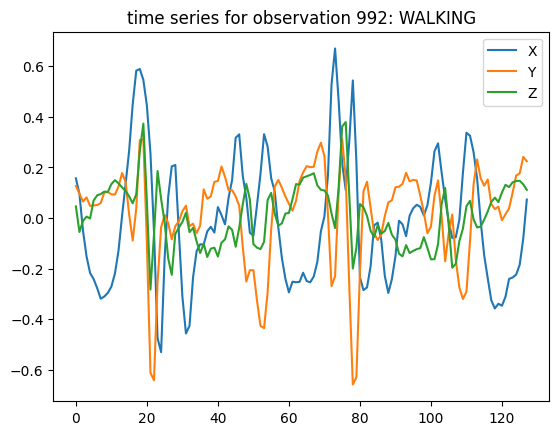

In [ ]:
#select the data for a random measurement

plot_data = test_measure_xyz[test_measure_xyz['observation'] == 992]

#or plot_data = test_measure_xyz[test_measure_xyz['observation'] == 2481]

#plot the time series for all three coordinates into one plot

plt.plot('time', 'X', data = plot_data)
plt.plot('time', 'Y', data = plot_data)
plt.plot('time', 'Z', data = plot_data)
plt.title("time series for observation 992: WALKING")
plt.legend()
plt.show()